In [1]:
import pandas as pd
import numpy as np
import pickle
from rdkit import Chem
from rdkit.Chem import Descriptors

## Add columns to dataframe with molecular descriptors

In [4]:
# Import data
df = pd.read_csv("../datasets/FINAL_DATA.csv")
df.head()

,SMILES,Molecule Name,LogD,LogS,Log_HLM_CLint,Log_MLM_CLint,Log_Caco_Papp_AB,Log_Caco_ER,Log_Mouse_PPB,Log_Mouse_BPB,Log_Mouse_MPB
0,CN1CCC[C@H]1COc1ccc(-c2nc3cc(-c4ccc5[nH]c(-c6c...,E-0001321,NaN,NaN,1.758912,2.263162,NaN,NaN,NaN,NaN,NaN
1,COc1ccc2c(c1)c1cc3cnccc3c(C)c1n2C,E-0001780,NaN,NaN,2.207904,3.131009,NaN,NaN,NaN,NaN,NaN
2,Cc1c2ccncc2cc2c3cc(OCCCN4CCN(C)CC4)ccc3n(C)c12,E-0001827,NaN,NaN,NaN,2.288920,NaN,NaN,NaN,NaN,NaN
3,CN(C)CCCOc1ccc(-c2nc3cc(NC(=O)c4ccc5[nH]c(-c6c...,E-0002019,NaN,NaN,1.021189,NaN,NaN,NaN,NaN,NaN,NaN
4,CN(C)CCCOc1ccc2nc(-c3ccc(-c4nc5ccc(OCCCN(C)C)c...,E-0002036,NaN,NaN,NaN,2.212188,NaN,NaN,NaN,NaN,0.005266


In [7]:
smi = df.iloc[0]["SMILES"]
mol = Chem.MolFromSmiles(smi)
descriptors = Descriptors.CalcMolDescriptors(mol)
descriptors

{'MaxAbsEStateIndex': np.float64(9.575039340463743),
 'MaxEStateIndex': np.float64(9.575039340463743),
 'MinAbsEStateIndex': np.float64(0.23874852520260292),
 'MinEStateIndex': np.float64(0.23874852520260292),
 'qed': 0.23197097508263892,
 'SPS': 15.871794871794872,
 'MolWt': 515.6170000000002,
 'HeavyAtomMolWt': 486.38500000000033,
 'ExactMolWt': 515.232125168,
 'NumValenceElectrons': 194,
 'NumRadicalElectrons': 0,
 'MaxPartialCharge': 0.13798954634251848,
 'MinPartialCharge': -0.5079662136116391,
 'MaxAbsPartialCharge': 0.5079662136116391,
 'MinAbsPartialCharge': 0.13798954634251848,
 'FpDensityMorgan1': 0.7692307692307693,
 'FpDensityMorgan2': 1.3076923076923077,
 'FpDensityMorgan3': 1.8461538461538463,
 'BCUT2D_MWHI': 16.478550449951936,
 'BCUT2D_MWLOW': 10.045830688834336,
 'BCUT2D_CHGHI': 2.2085837441445992,
 'BCUT2D_CHGLO': -2.1917293311000225,
 'BCUT2D_LOGPHI': 2.29903542993179,
 'BCUT2D_LOGPLOW': -2.300763441779458,
 'BCUT2D_MRHI': 5.882644486797199,
 'BCUT2D_MRLOW': 0.198042

In [10]:
descriptors.keys()

dict_keys(['MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_

In [9]:
molwt = Descriptors.ExactMolWt(mol)
molwt

515.232125168

## Plot embeddings

From ChemProp's `mpnn_fingerprints.ipynb` file, I am gathering that `fingerprints` are casually defined as the "input" to the FFN, i.e. after having passed through 0 layers of the MLP.
`encodings` are casually defined as some intermediate extracted vector representation of the molecules in the FFN, either in intermediate layers or right before the final FFN output.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from pathlib import Path

from chemprop import data, featurizers, models

In [3]:
with open("../../representations/combined_data_with_chemeleon_fingerprints.pkl", "rb") as file:
    df = pickle.load(file)

In [4]:
df["CheMeleon Fingerprint"][0].shape

(2048,)

In [5]:
arr = df["CheMeleon Fingerprint"].to_numpy()

In [11]:
np.save("../../representations/chemeleon_fingerprints1.npy", arr)

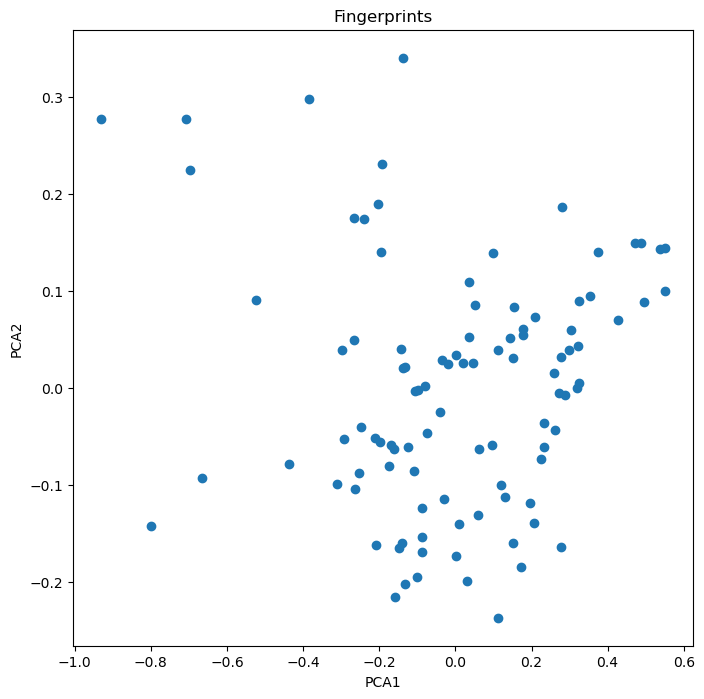

In [ ]:
fingerprints = fingerprints.detach()

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(fingerprints)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Fingerprints")
ax.set_xlabel('PCA1'); ax.set_ylabel('PCA2')

ax.scatter(principalComponents[:, 0], principalComponents[:, 1])
plt.show()